# Batch Digesters Data Analysis and Predictive Modelling


## Import Libraries

In [ ]:
# Import libraries and mount drive
import numpy as np
import math as math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn as sks
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_score

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Light Data Exploration and Data Cleaning

In [ ]:
# Load the dataframes
batch_1 = pd.read_excel('/content/drive/MyDrive/Batch Digesters/IBC Tanks Experimental Design.xlsx', sheet_name='Batch 1')
batch_2 = pd.read_excel('/content/drive/MyDrive/Batch Digesters/IBC Tanks Experimental Design.xlsx', sheet_name='Batch 2')
batch_3 = pd.read_excel('/content/drive/MyDrive/Batch Digesters/IBC Tanks Experimental Design.xlsx', sheet_name='Batch 3')
batch_4 = pd.read_excel('/content/drive/MyDrive/Batch Digesters/IBC Tanks Experimental Design.xlsx', sheet_name='Batch 4')
batch_5 = pd.read_excel('/content/drive/MyDrive/Batch Digesters/IBC Tanks Experimental Design.xlsx', sheet_name='Batch 5')
batch_6 = pd.read_excel('/content/drive/MyDrive/Batch Digesters/IBC Tanks Experimental Design.xlsx', sheet_name='Batch 6')
batch_7 = pd.read_excel('/content/drive/MyDrive/Batch Digesters/IBC Tanks Experimental Design.xlsx', sheet_name='Batch 7')
batch_8 = pd.read_excel('/content/drive/MyDrive/Batch Digesters/IBC Tanks Experimental Design.xlsx', sheet_name='Batch 8')
batch_9 = pd.read_excel('/content/drive/MyDrive/Batch Digesters/IBC Tanks Experimental Design.xlsx', sheet_name='Batch 9')
batch_10 = pd.read_excel('/content/drive/MyDrive/Batch Digesters/IBC Tanks Experimental Design.xlsx', sheet_name='Batch 10')
batch_11 = pd.read_excel('/content/drive/MyDrive/Batch Digesters/IBC Tanks Experimental Design.xlsx', sheet_name='Batch 11')
batch_12 = pd.read_excel('/content/drive/MyDrive/Batch Digesters/IBC Tanks Experimental Design.xlsx', sheet_name='Batch 12')
batch_13 = pd.read_excel('/content/drive/MyDrive/Batch Digesters/IBC Tanks Experimental Design.xlsx', sheet_name='Batch 13')
batch_14 = pd.read_excel('/content/drive/MyDrive/Batch Digesters/IBC Tanks Experimental Design.xlsx', sheet_name='Batch 14')
batch_15 = pd.read_excel('/content/drive/MyDrive/Batch Digesters/IBC Tanks Experimental Design.xlsx', sheet_name='Batch 15')
batch_16 = pd.read_excel('/content/drive/MyDrive/Batch Digesters/IBC Tanks Experimental Design.xlsx', sheet_name='Batch 16')
settings = pd.read_excel('/content/drive/MyDrive/Batch Digesters/IBC Tanks Experimental Design.xlsx', sheet_name='Settings')

In [ ]:
# check value counts
dataframes = [batch_1, batch_2, batch_3, batch_4, batch_5, batch_6, batch_7, batch_8, batch_9, batch_10, batch_11, batch_12, batch_13, batch_14, batch_15, batch_16]

for col in batch_1.columns:
  print(batch_8[col].value_counts())
  print(' ')

2021-01-04    1
2021-01-05    1
2021-01-30    1
2021-01-29    1
2021-01-28    1
2021-01-27    1
2021-01-26    1
2021-01-25    1
2021-01-24    1
2021-01-23    1
2021-01-22    1
2021-01-21    1
2021-01-20    1
2021-01-19    1
2021-01-18    1
2021-01-17    1
2021-01-16    1
2021-01-15    1
2021-01-14    1
2021-01-13    1
2021-01-12    1
2021-01-11    1
2021-01-10    1
2021-01-09    1
2021-01-08    1
2021-01-07    1
2021-01-06    1
2021-01-31    1
Name: Date, dtype: int64
 
55.4    4
58.0    2
58.7    1
52.2    1
51.1    1
52.9    1
51.4    1
53.9    1
54.6    1
57.1    1
58.4    1
58.6    1
28.6    1
32.9    1
56.4    1
56.3    1
57.8    1
53.6    1
52.5    1
53.1    1
52.4    1
25.7    1
41.0    1
53.7    1
Name: CH4, dtype: int64
 
38.5    2
37.8    2
35.4    2
23.8    1
36.8    1
38.3    1
38.9    1
39.4    1
38.4    1
37.4    1
37.6    1
37.7    1
36.9    1
36.6    1
25.5    1
35.9    1
34.8    1
34.7    1
30.1    1
28.9    1
31.6    1
30.8    1
20.7    1
28.1    1
39.3    1
Name: CO2

## Feature Engineering

In [ ]:
# create another column for gas collection
for col in dataframes:
  col['gas_volume'] = col['Final Gas Reading'] - col['Initial Gas Reading']

In [ ]:
# create column for cumulative sum of gas production
for df in dataframes:
  df['gas_cumsum'] = df['gas_volume'].cumsum()

# create column for day
for df in dataframes:
  df['day'] = df.index

In [ ]:
# create another column for total gas yield
total_gas_yield = list()
for df in dataframes:
  total_gas_yield.append(df['gas_volume'].sum())

settings['total_gas_yield'] = pd.DataFrame(total_gas_yield)

# create another column for average methane quality
methane_quality = list()
for df in dataframes:
  methane_quality.append(df['CH4'].mean())

settings['average_methane'] = pd.DataFrame(methane_quality)

# create another column for standard deviation for methane quality
std_methane = list()
for df in dataframes:
  std_methane.append(df['CH4'].std())

settings['std_methane'] = pd.DataFrame(std_methane)

settings

,Run,C/N,TS,percent_manure,percent_water,percent_straw,total_gas_yield,average_methane,std_methane
0,1,30.00,30.00,14.707503,84.692346,0.600151,324.0,36.682143,13.171941
1,2,30.00,15.00,7.963245,91.711809,0.324946,248.0,37.635714,13.638649
2,3,23.00,30.00,32.305377,67.391166,0.303457,243.0,52.503571,8.154684
3,4,23.00,30.00,14.707503,84.692346,0.600151,558.0,49.346429,8.876080
4,5,26.50,35.11,24.097492,75.351740,0.550768,292.0,52.485714,3.740342
5,6,20.61,22.50,38.025467,61.898757,0.075776,393.0,57.157143,4.350005
6,7,26.50,9.89,8.244882,91.566674,0.188444,257.0,46.582143,12.521006
7,8,23.00,15.00,19.299332,80.519382,0.181286,415.0,51.803571,8.795179
8,9,32.39,22.50,8.892214,90.601693,0.506093,228.0,33.682143,6.785991
9,10,26.50,22.50,16.941171,82.671625,0.387205,349.0,54.882143,5.194303


## Exploratory Data Analysis

Questions:

1. What is the biogas yield per input (manure and straw)?
2. What is the relationship of %manure to biogas yield and quality?
3. What is the relationship of %straw to biogas yield and quality?

Text(0.5, 1.0, 'Percent Manure versus Total Gas Yield (L)')

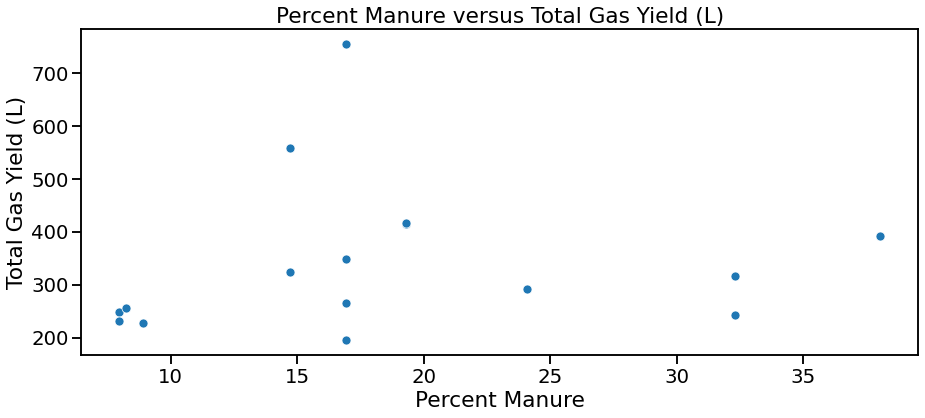

In [ ]:
# scatter plot of percent manure versus biogas yield
plt.figure(figsize=(15,6))
sns.scatterplot(x='percent_manure', y='total_gas_yield', data=settings)
plt.xlabel('Percent Manure')
plt.ylabel('Total Gas Yield (L)')
plt.title('Percent Manure versus Total Gas Yield (L)')

Text(0.5, 1.0, 'Percent Manure versus Average Methane Concentration')

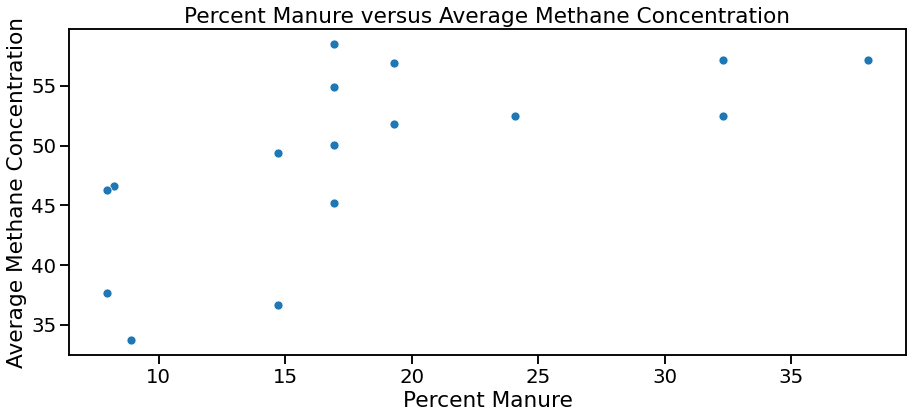

In [ ]:
# scatter plot of percent manure versus average methane quality
plt.figure(figsize=(15,6))
sns.scatterplot(x='percent_manure', y='average_methane', data=settings)
plt.xlabel('Percent Manure')
plt.ylabel('Average Methane Concentration')
plt.title('Percent Manure versus Average Methane Concentration')

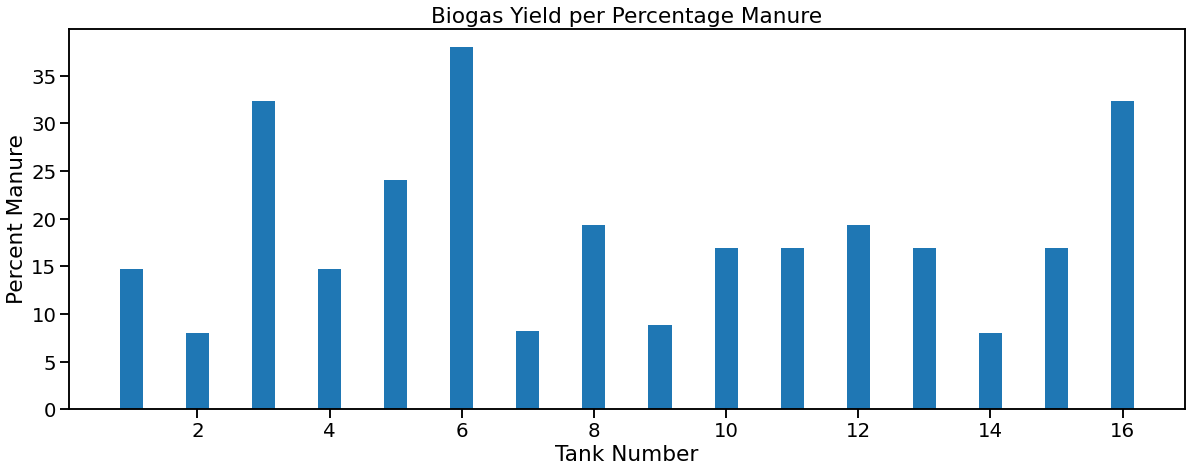

In [ ]:
# plot of percent manure versus biogas yield
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
manure_percent = settings['percent_manure'][0:16].to_list()
width = 0.35

plt.figure(figsize=(20,7))

plt.bar(labels, manure_percent, width, label='Percent Manure')

plt.xlabel('Tank Number')
plt.ylabel('Percent Manure')
plt.title('Biogas Yield per Percentage Manure')

plt.show()

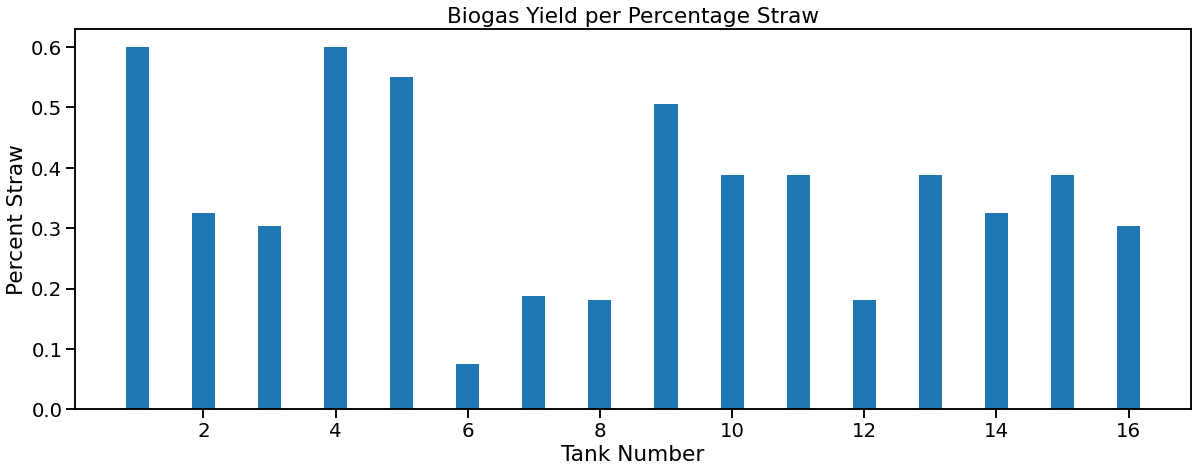

In [ ]:
# plot of percent straw versus biogas yield
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
straw_percent = settings['percent_straw'][0:16].to_list()
width = 0.35

plt.figure(figsize=(20,7))

plt.bar(labels, straw_percent, width, label='Percent Straw')

plt.xlabel('Tank Number')
plt.ylabel('Percent Straw')
plt.title('Biogas Yield per Percentage Straw')

plt.show()

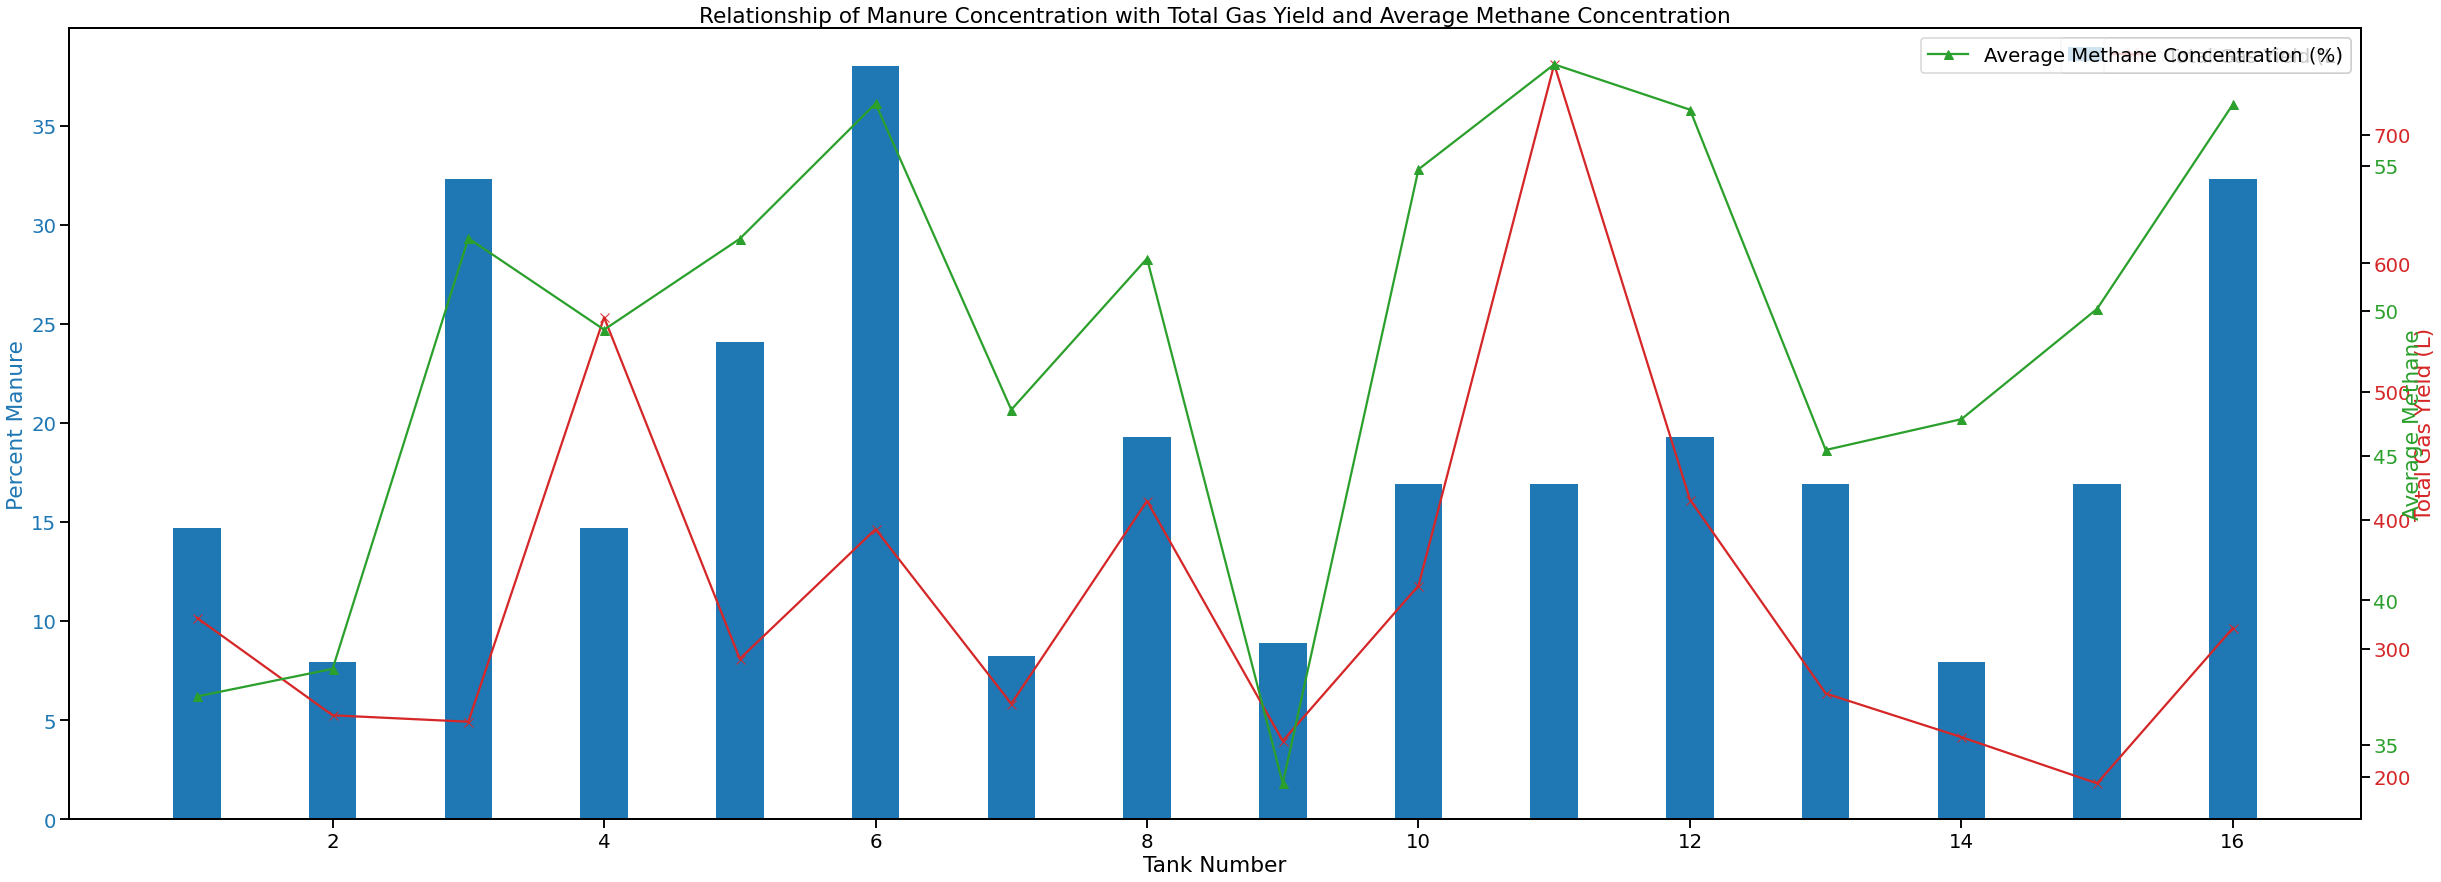

In [ ]:
# Plot of manure concentration versus total gas yield and average methane concentration
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
manure_percent = settings['percent_manure'][0:16].to_list()
total_gas_yield = settings['total_gas_yield'][0:16].to_list()
average_methane = settings['average_methane'][0:16].to_list()
width = 0.35

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Tank Number')
ax1.set_ylabel('Percent Manure', color=color)
plt.bar(labels, manure_percent, width, label='Manure Concentration')
ax1.tick_params(axis='y', labelcolor=color)
plt.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Total Gas Yield (L)', color=color)  # we already handled the x-label with ax1
ax2.plot(labels, total_gas_yield, color=color, marker='x', label='Total Gas Yield (L)')
ax2.tick_params(axis='y', labelcolor=color)
plt.legend()

ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax3.set_ylabel('Average Methane', color=color)  # we already handled the x-label with ax1
ax3.plot(labels, average_methane, color=color, marker='^', label='Average Methane Concentration (%)')
ax3.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.set_figheight(15)
fig.set_figwidth(50)
plt.title('Relationship of Manure Concentration with Total Gas Yield and Average Methane Concentration')
plt.legend()
plt.show()

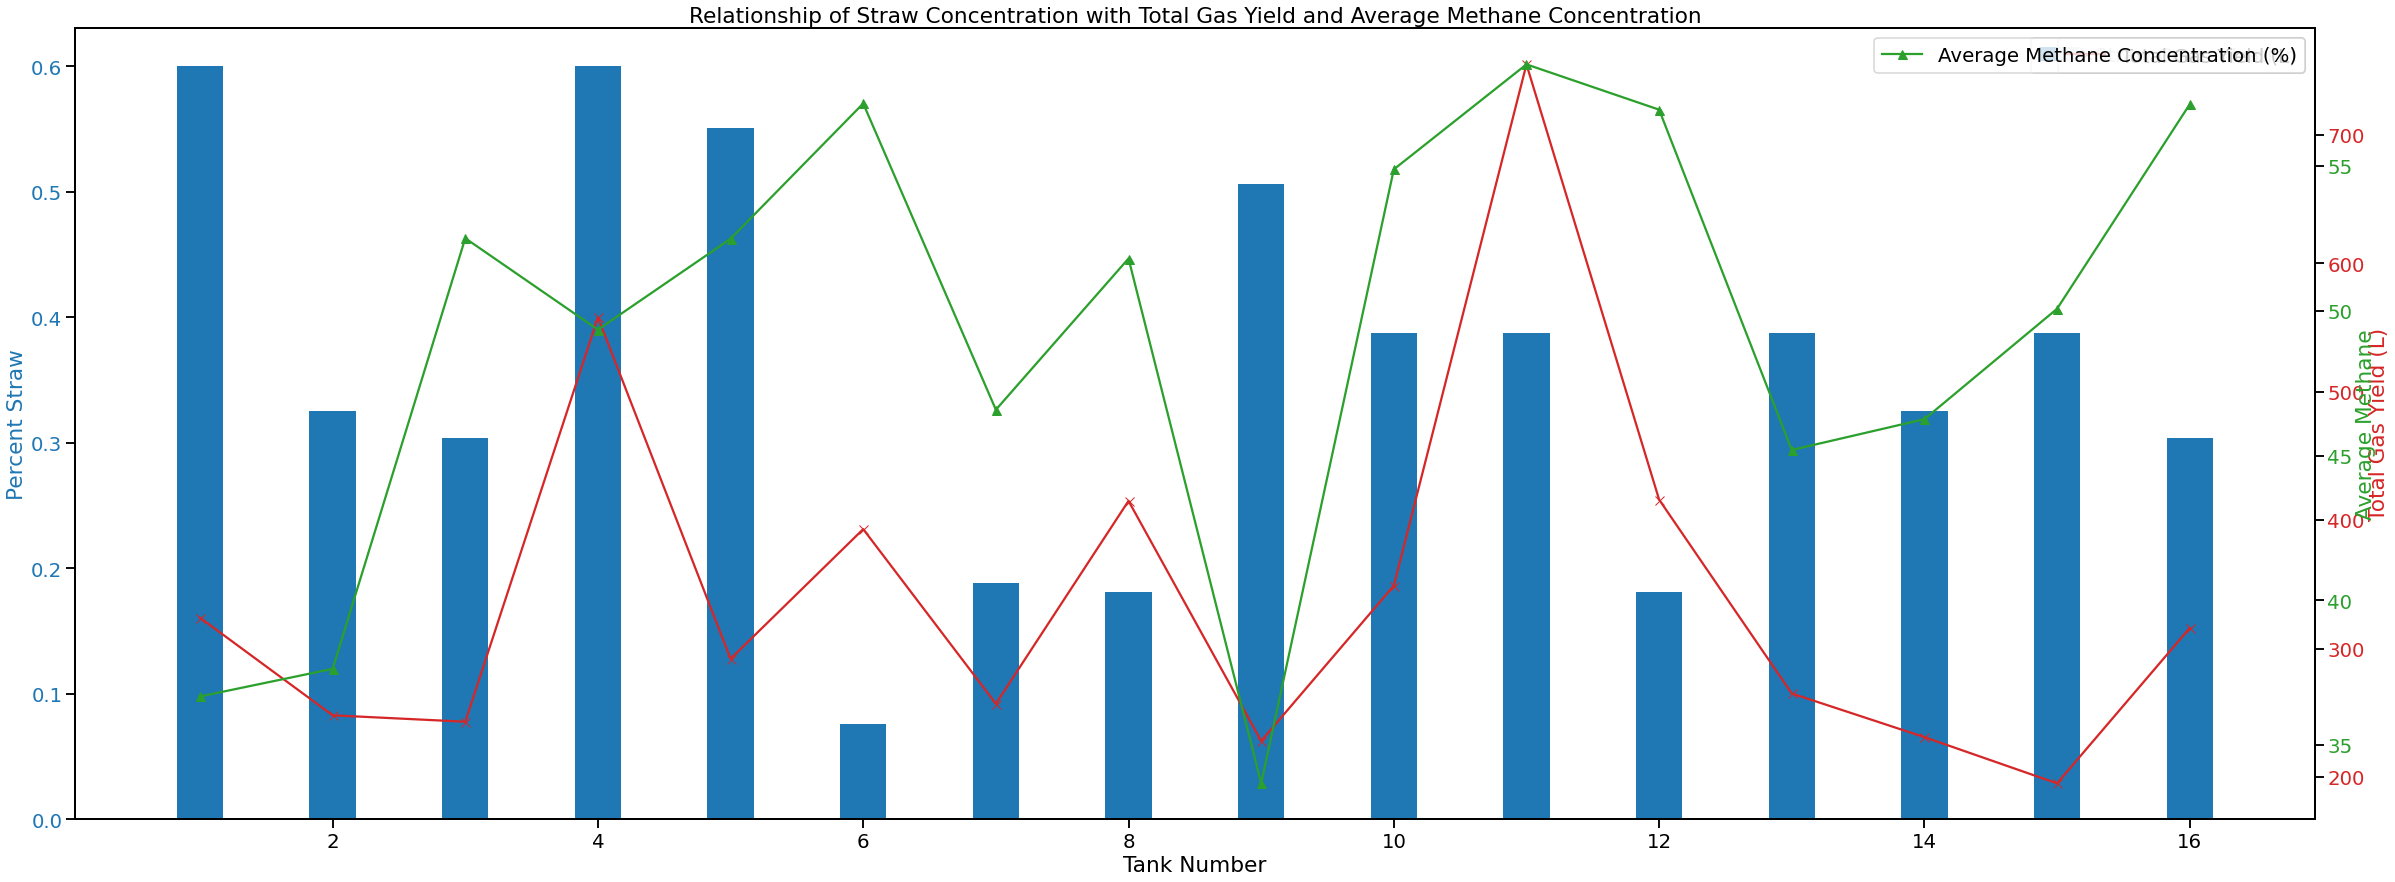

In [ ]:
# Plot of manure concentration versus total gas yield and average methane concentration
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
straw_percent = settings['percent_straw'][0:16].to_list()
total_gas_yield = settings['total_gas_yield'][0:16].to_list()
average_methane = settings['average_methane'][0:16].to_list()
width = 0.35

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Tank Number')
ax1.set_ylabel('Percent Straw', color=color)
plt.bar(labels, straw_percent, width, label='Straw Concentration')
ax1.tick_params(axis='y', labelcolor=color)
plt.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Total Gas Yield (L)', color=color)  # we already handled the x-label with ax1
ax2.plot(labels, total_gas_yield, color=color, marker='x', label='Total Gas Yield (L)')
ax2.tick_params(axis='y', labelcolor=color)
plt.legend()

ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax3.set_ylabel('Average Methane', color=color)  # we already handled the x-label with ax1
ax3.plot(labels, average_methane, color=color, marker='^', label='Average Methane Concentration (%)')
ax3.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.set_figheight(15)
fig.set_figwidth(50)
plt.title('Relationship of Straw Concentration with Total Gas Yield and Average Methane Concentration')
plt.legend()
plt.show()

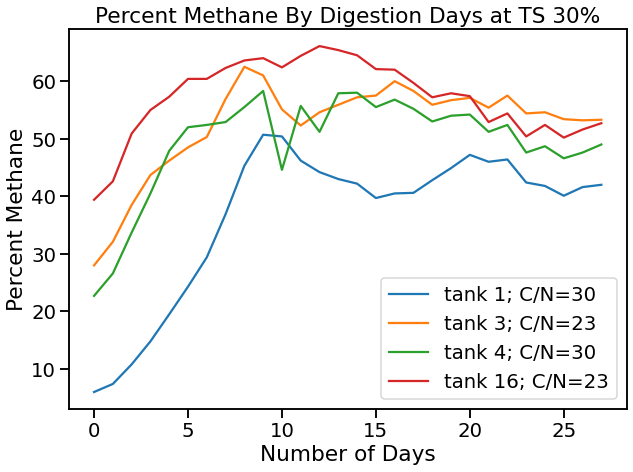

In [ ]:
# plot percent CH4 based on TS value: +1
gas = ['CH4', 'CO2', 'O2', 'H2S', 'Balance']
sns.set_context('talk', font_scale=1.2)
plt.figure(figsize=(10,7))
sns.lineplot(x=batch_1['day'], y=batch_1['CH4'], label='tank 1; C/N=30')
sns.lineplot(x=batch_3['day'], y=batch_3['CH4'], label='tank 3; C/N=23')
sns.lineplot(x=batch_4['day'], y=batch_4['CH4'], label='tank 4; C/N=30')
sns.lineplot(x=batch_16['day'], y=batch_16['CH4'], label='tank 16; C/N=23')
plt.xlabel('Number of Days')
plt.ylabel("Percent Methane")
plt.title('Percent Methane By Digestion Days at TS 30%')
plt.show()

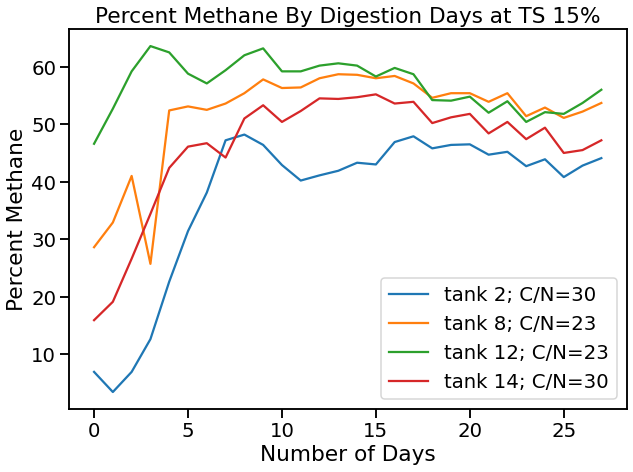

In [ ]:
# plot percent CH4 based on TS value: -1
sns.set_context('talk', font_scale=1.2)
plt.figure(figsize=(10,7))
sns.lineplot(x=batch_2['day'], y=batch_2['CH4'], label='tank 2; C/N=30')
sns.lineplot(x=batch_8['day'], y=batch_8['CH4'], label='tank 8; C/N=23')
sns.lineplot(x=batch_12['day'], y=batch_12['CH4'], label='tank 12; C/N=23')
sns.lineplot(x=batch_14['day'], y=batch_14['CH4'], label='tank 14; C/N=30')
plt.xlabel('Number of Days')
plt.ylabel("Percent Methane")
plt.title('Percent Methane By Digestion Days at TS 15%')
plt.show()

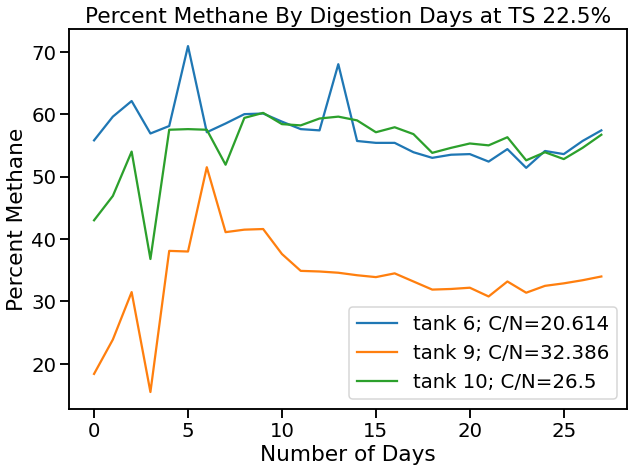

In [ ]:
# plot the percent CH4 based on TS value: 0
sns.set_context('talk', font_scale=1.2)
plt.figure(figsize=(10,7))
sns.lineplot(x=batch_6['day'], y=batch_6['CH4'], label='tank 6; C/N=20.614')
sns.lineplot(x=batch_9['day'], y=batch_9['CH4'], label='tank 9; C/N=32.386')
sns.lineplot(x=batch_10['day'], y=batch_10['CH4'], label='tank 10; C/N=26.5') #aggregate the values for TS 0
#sns.lineplot(x=batch_11['day'], y=batch_11['CH4'], label='tank 11; C/N=26.5')
#sns.lineplot(x=batch_13['day'], y=batch_13['CH4'], label='tank 13; C/N=26.5')
#sns.lineplot(x=batch_15['day'], y=batch_15['CH4'], label='tank 15; C/N=26.5')
plt.xlabel('Number of Days')
plt.ylabel("Percent Methane")
plt.title('Percent Methane By Digestion Days at TS 22.5%')
plt.show()

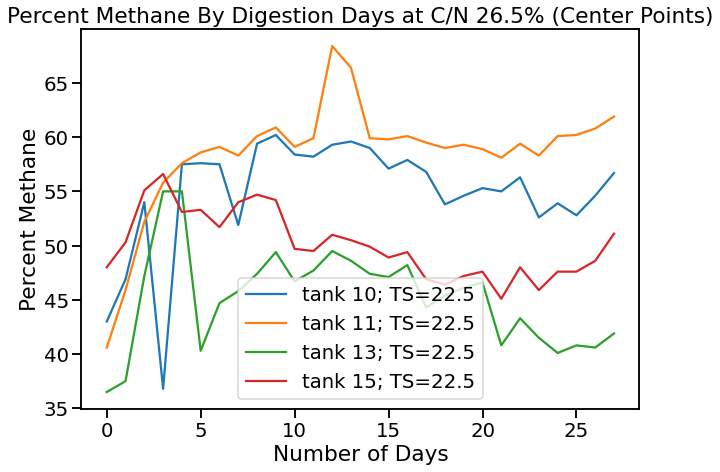

In [ ]:
# plot percent CH4 for C/N value: 0
sns.set_context('talk', font_scale=1.2)
plt.figure(figsize=(10,7))
sns.lineplot(x=batch_10['day'], y=batch_10['CH4'], label='tank 10; TS=22.5') #aggregate the values for TS 0
sns.lineplot(x=batch_11['day'], y=batch_11['CH4'], label='tank 11; TS=22.5')
sns.lineplot(x=batch_13['day'], y=batch_13['CH4'], label='tank 13; TS=22.5')
sns.lineplot(x=batch_15['day'], y=batch_15['CH4'], label='tank 15; TS=22.5')
plt.xlabel('Number of Days')
plt.ylabel("Percent Methane")
plt.title('Percent Methane By Digestion Days at C/N 26.5% (Center Points)')
plt.show()

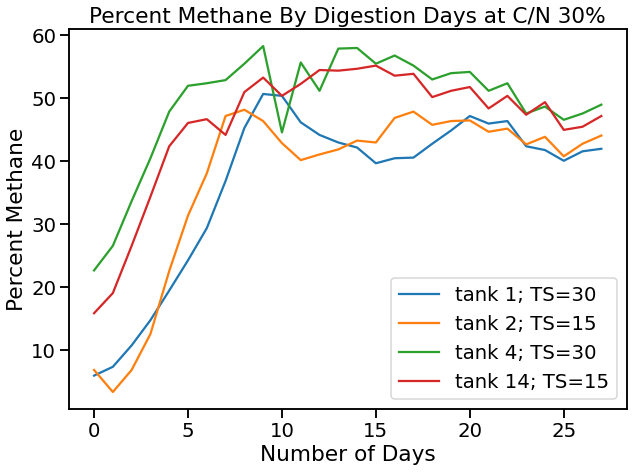

In [ ]:
# plot percent CH4 for C/N value: +1
sns.set_context('talk', font_scale=1.2)
plt.figure(figsize=(10,7))
sns.lineplot(x=batch_1['day'], y=batch_1['CH4'], label='tank 1; TS=30')
sns.lineplot(x=batch_2['day'], y=batch_2['CH4'], label='tank 2; TS=15')
sns.lineplot(x=batch_4['day'], y=batch_4['CH4'], label='tank 4; TS=30')
sns.lineplot(x=batch_14['day'], y=batch_14['CH4'], label='tank 14; TS=15')
plt.xlabel('Number of Days')
plt.ylabel("Percent Methane")
plt.title('Percent Methane By Digestion Days at C/N 30%')
plt.show()

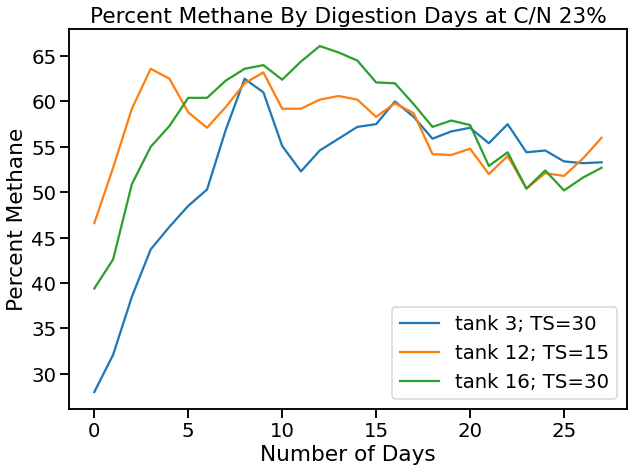

In [ ]:
# plot percent CH4 for C/N value: -1
sns.set_context('talk', font_scale=1.2)
plt.figure(figsize=(10,7))
sns.lineplot(x=batch_3['day'], y=batch_3['CH4'], label='tank 3; TS=30')
sns.lineplot(x=batch_12['day'], y=batch_12['CH4'], label='tank 12; TS=15')
sns.lineplot(x=batch_16['day'], y=batch_16['CH4'], label='tank 16; TS=30')
plt.xlabel('Number of Days')
plt.ylabel("Percent Methane")
plt.title('Percent Methane By Digestion Days at C/N 23%')
plt.show()

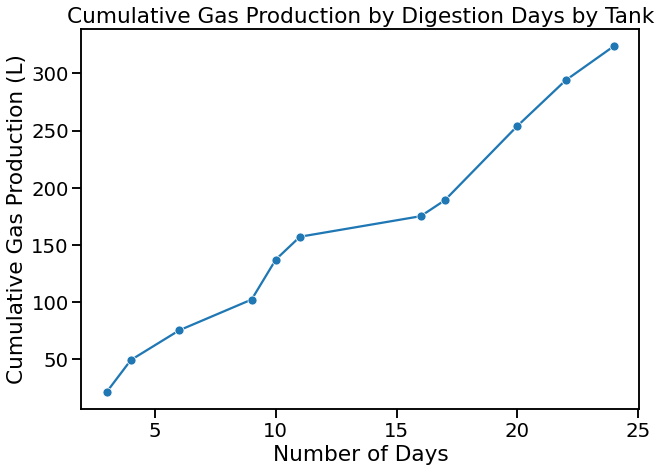

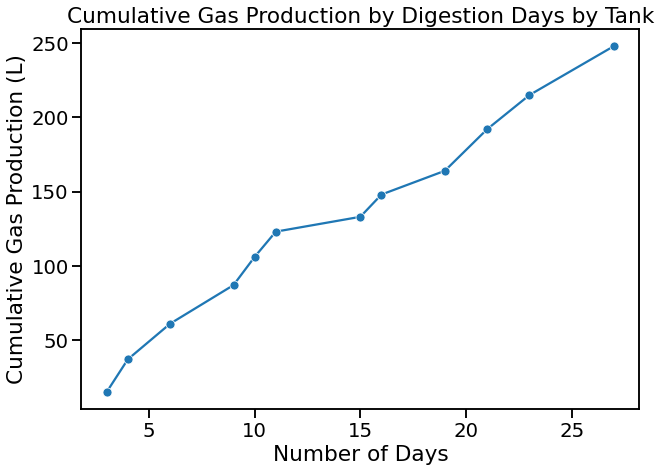

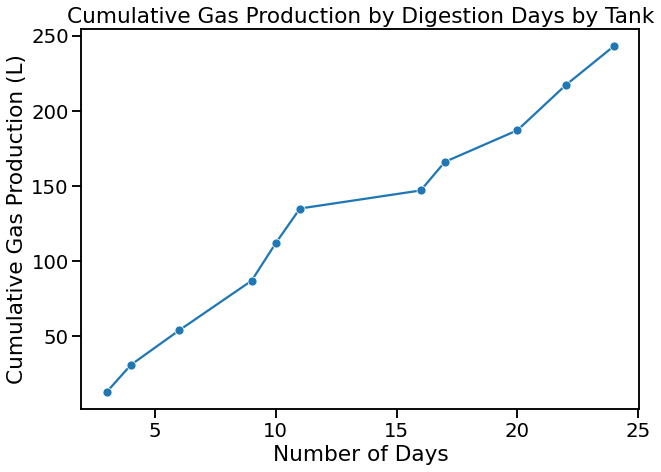

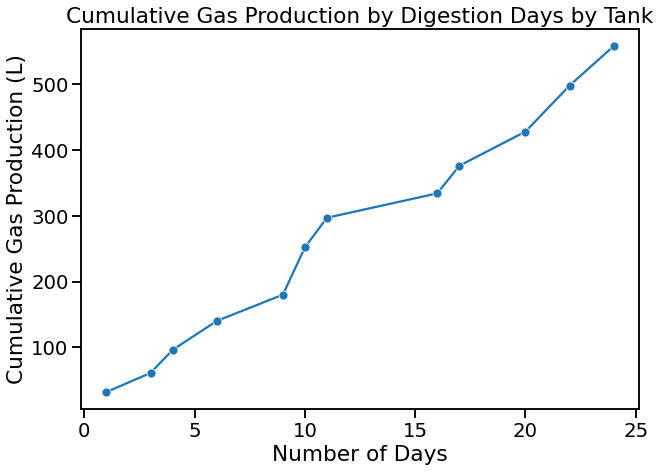

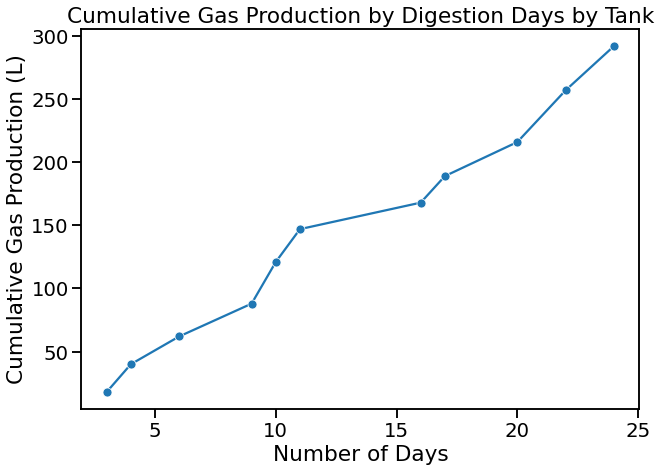

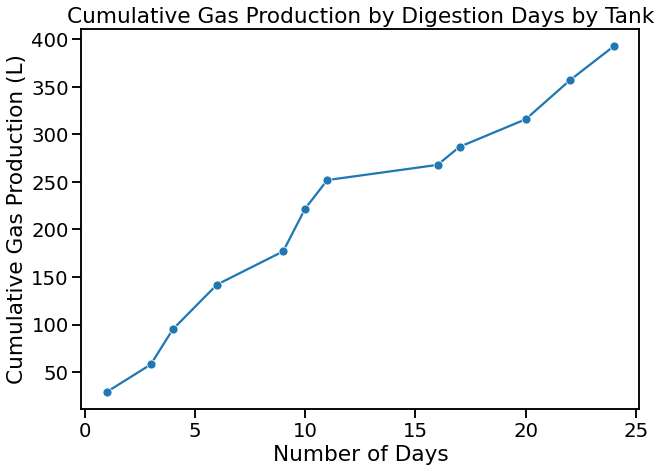

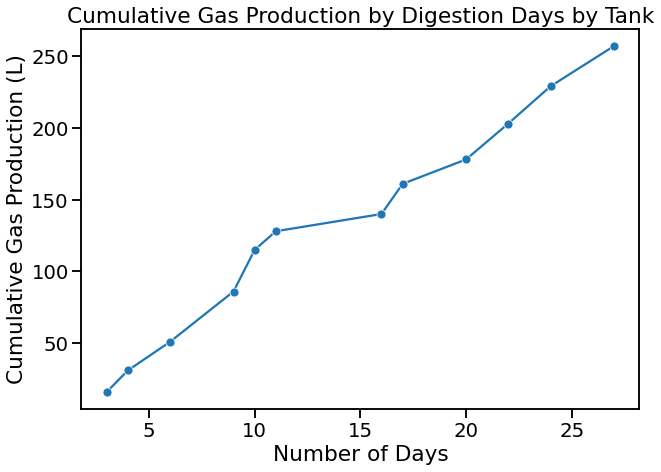

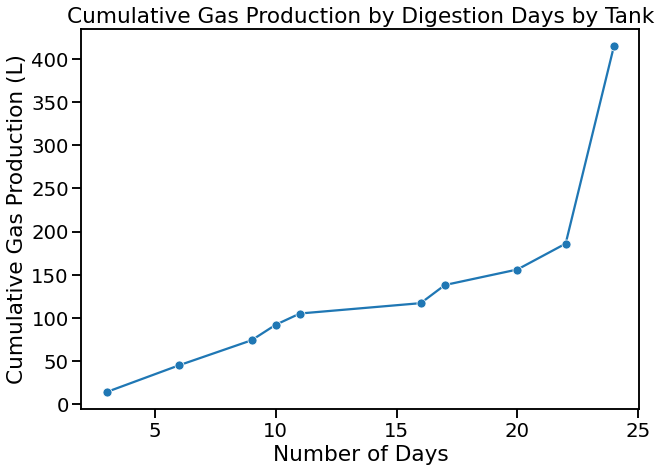

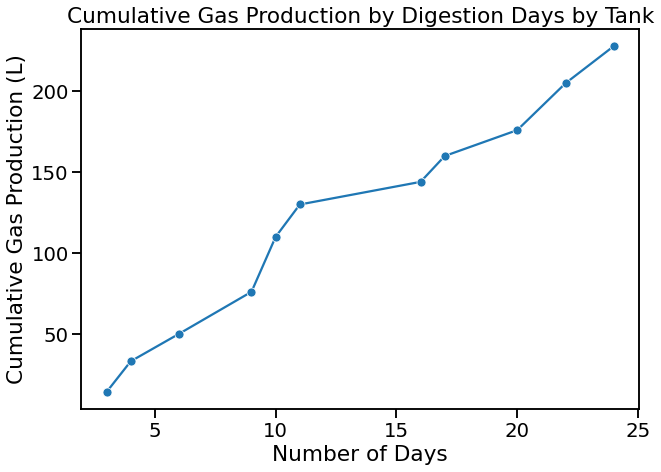

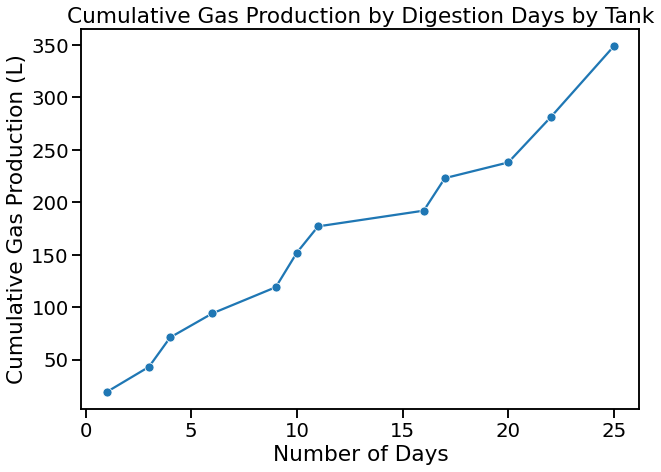

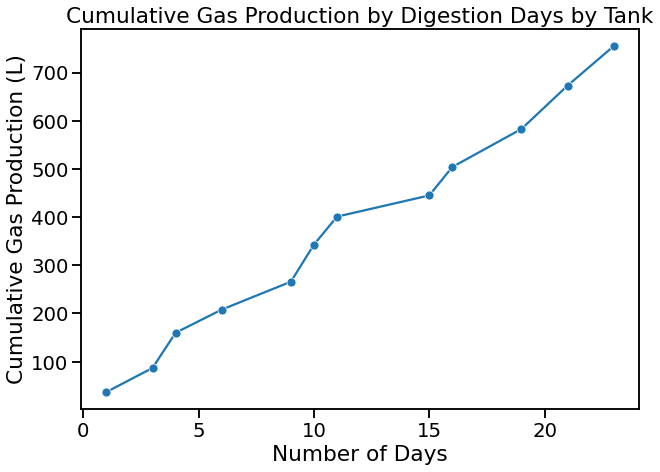

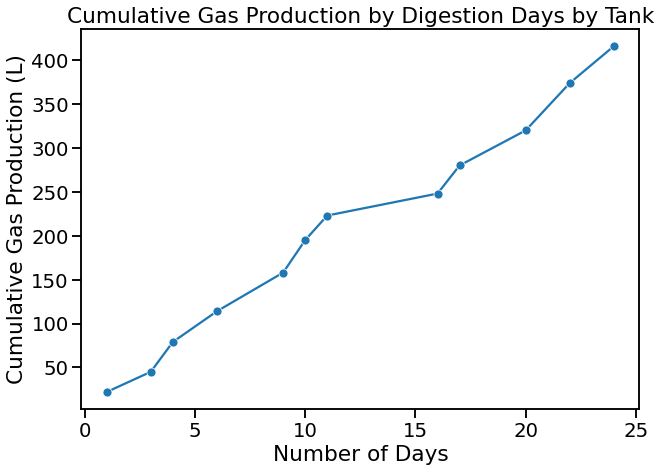

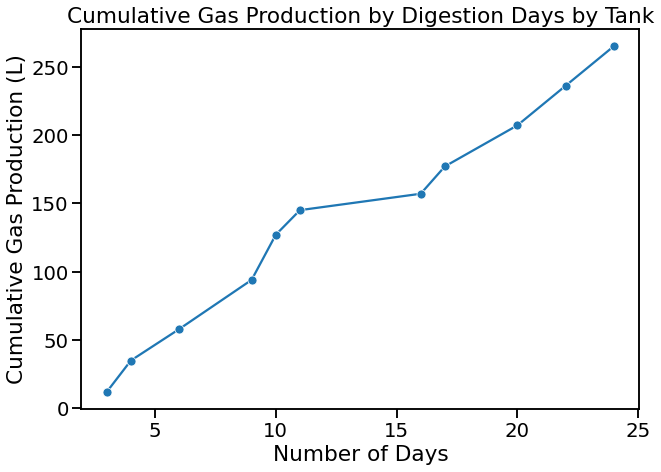

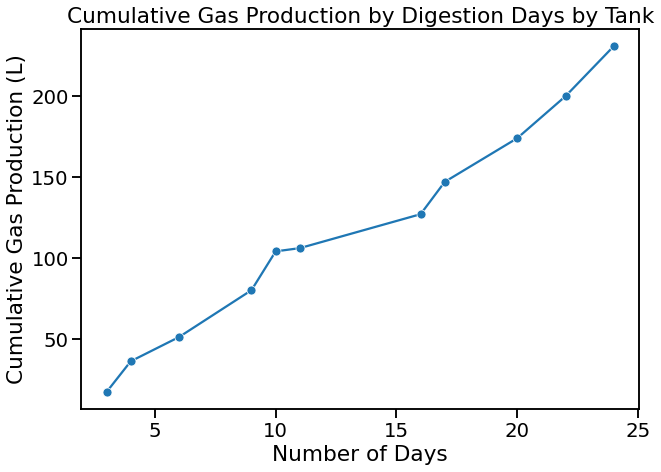

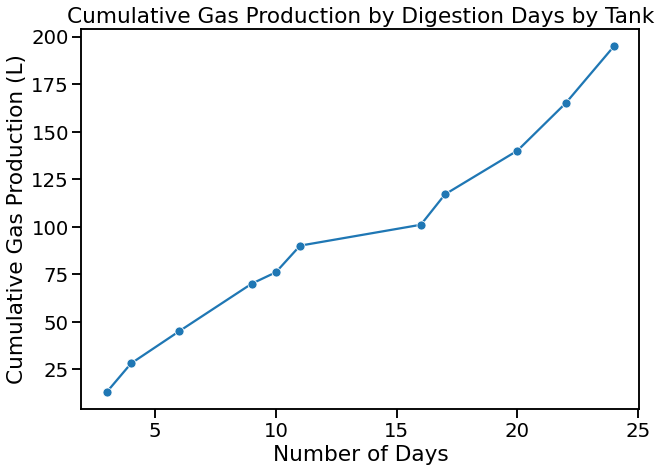

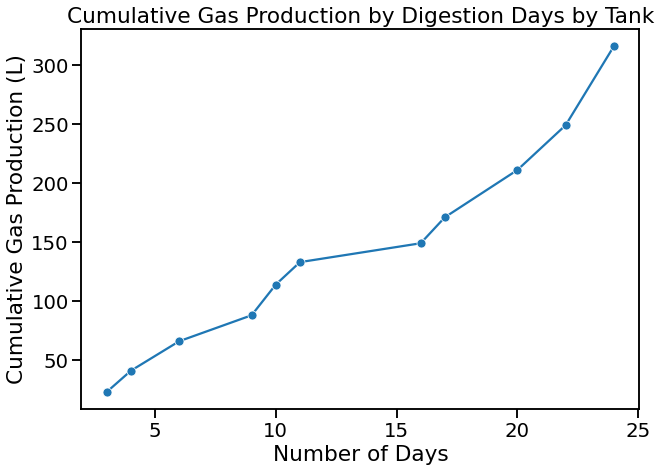

In [ ]:
# Create a plot for methane with cumulative gas production on the right axis

# Create plot for cumulative gas production
tanks = ['tank 1', 'tank 2', 'tank 3', 'tank 4', 'tank 5', 'tank 6', 'tank 7', 'tank 8', 'tank 9', 'tank 10', 'tank 11', 'tank 12', 'tank 13', 'tank 14', 'tank 15', 'tank 16']
for df in dataframes:
  sns.set_context('talk', font_scale=1.2)
  plt.figure(figsize=(10,7))
  sns.lineplot(x=df['day'], y=df['gas_cumsum'], marker='o')
  plt.xlabel('Number of Days')
  plt.ylabel("Cumulative Gas Production (L)")
  plt.title(f'Cumulative Gas Production by Digestion Days by Tank')
  plt.show()

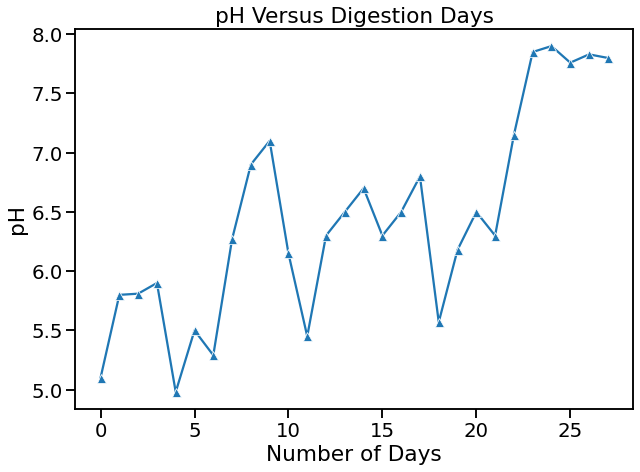

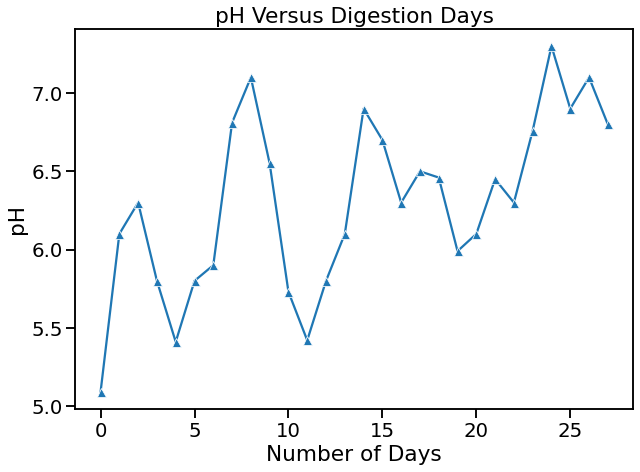

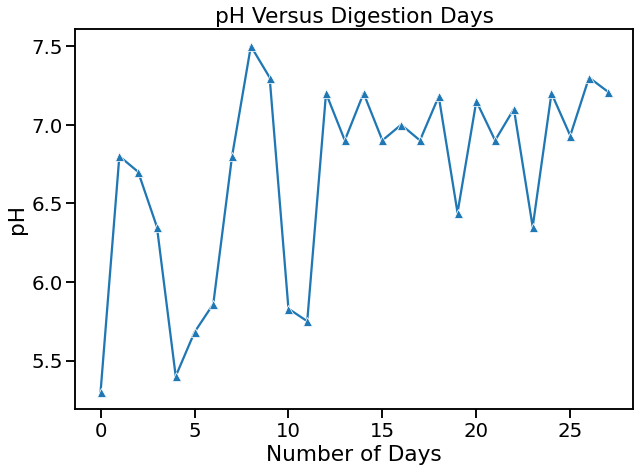

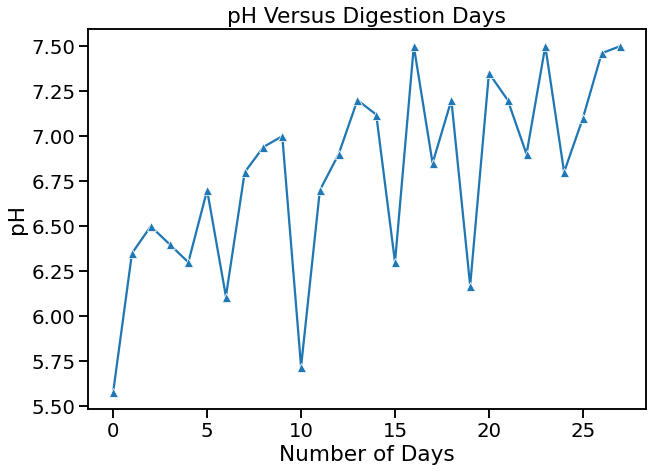

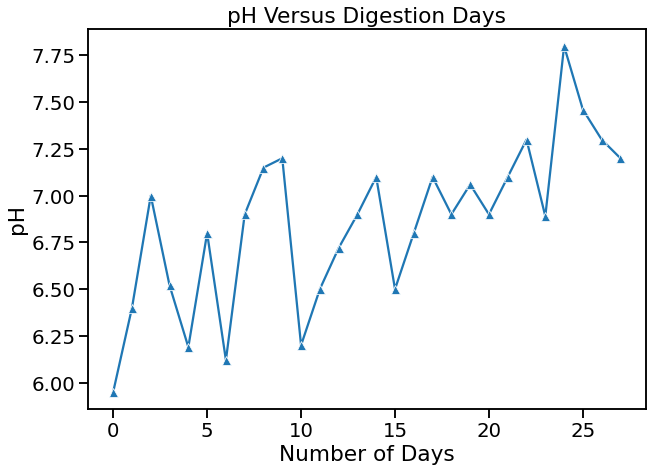

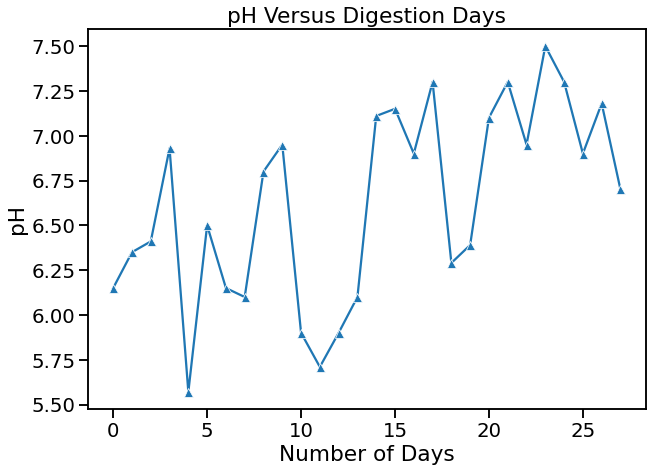

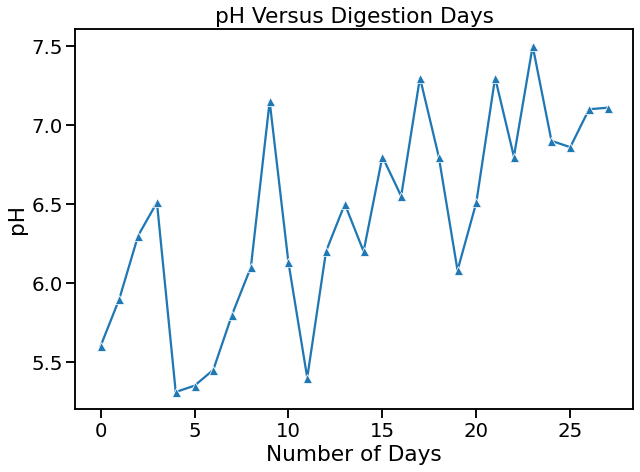

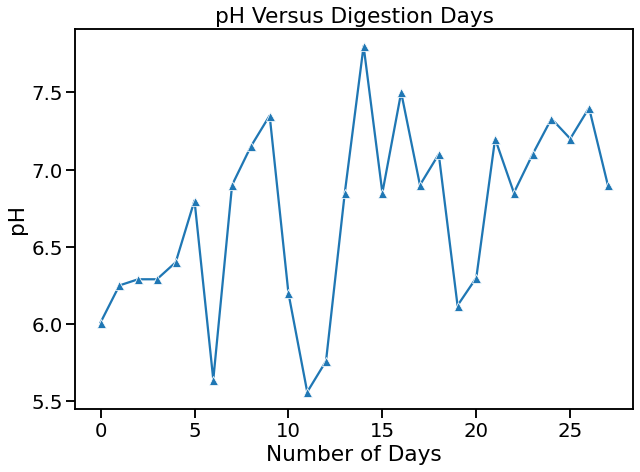

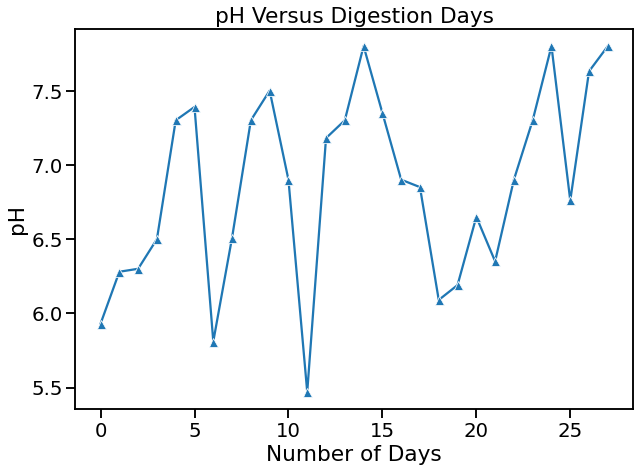

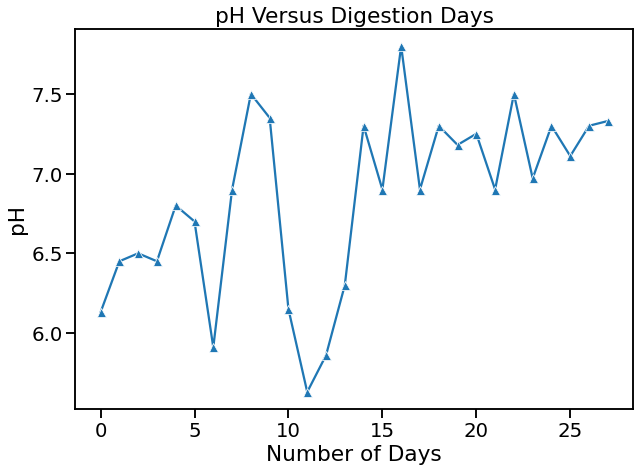

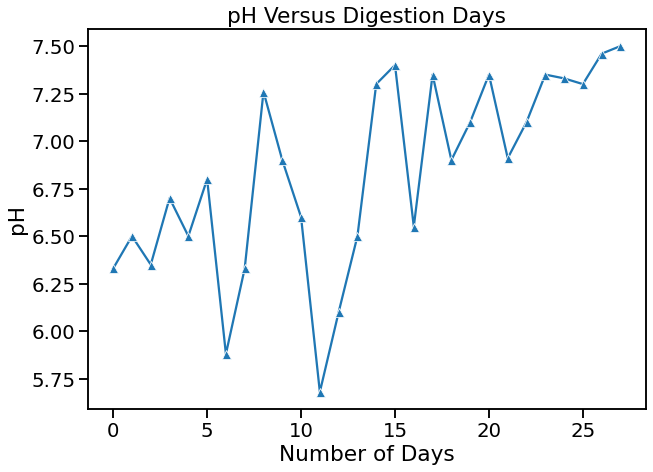

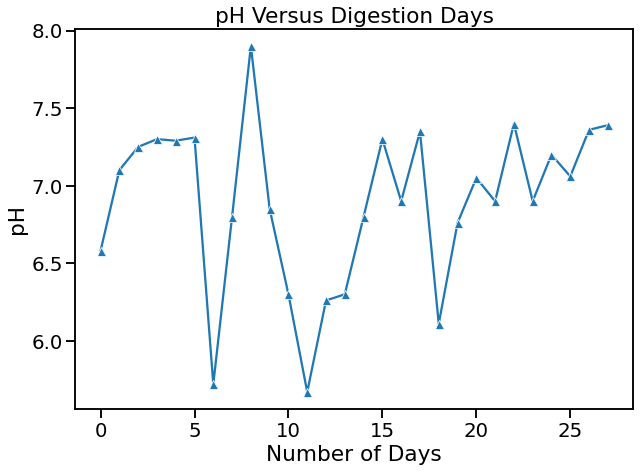

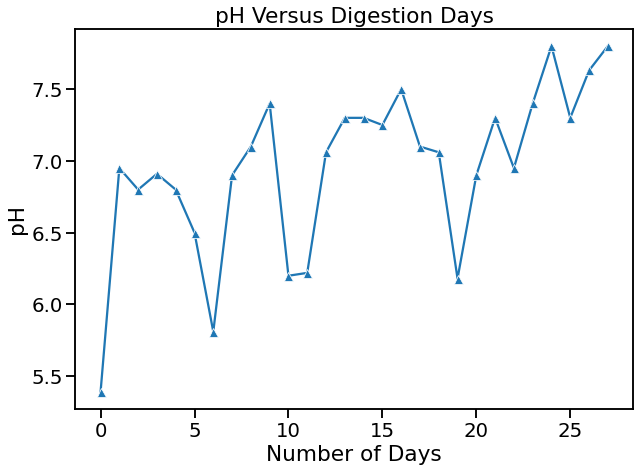

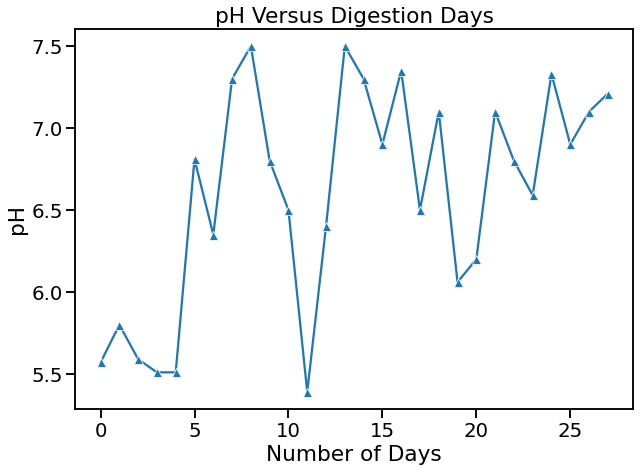

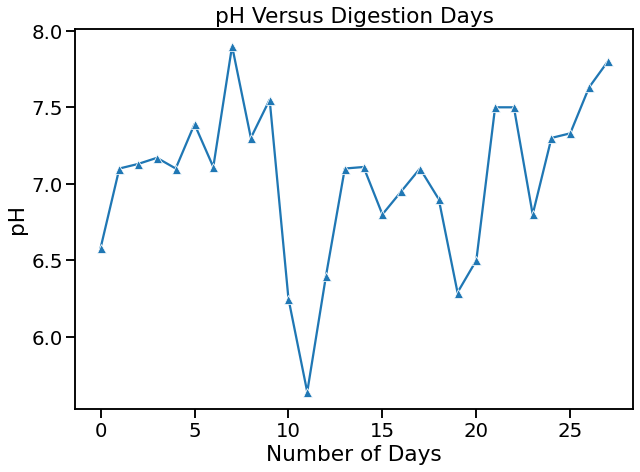

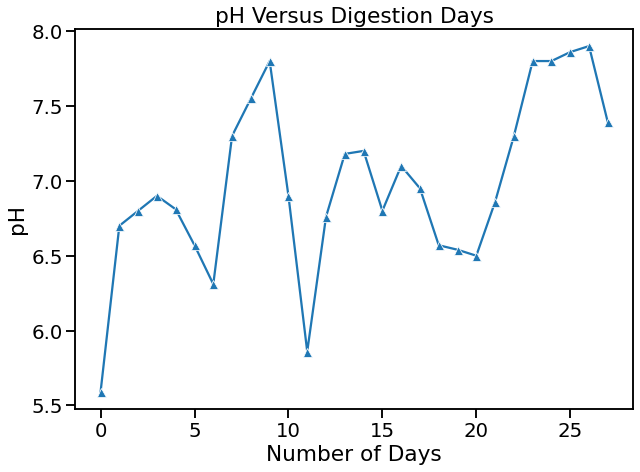

In [ ]:
# Create a plot for pH against digestion days
for item in dataframes: 
  sns.set_context('talk', font_scale=1.2)
  plt.figure(figsize=(10,7))
  sns.lineplot(x=item['day'], y=item['pH'], marker='^')
  plt.xlabel('Number of Days')
  plt.ylabel("pH")
  plt.title('pH Versus Digestion Days')
  plt.show()

## Data Preprocessing

In [ ]:
# Import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# import random forest regressor
from sklearn.ensemble import RandomForestRegressor

# instantiate the random forest regressor
rf = RandomForestRegressor()

# Instantiate iterative imputer
imp = IterativeImputer(estimator=rf, max_iter=10, random_state=101)

# Fit and transform each dataframes
for df in dataframes:
  ts = imp.fit_transform(df[['Digestate Temperature', 'pH', 'Total Solids (TS)']].to_numpy())
  vs = imp.fit_transform(df[['Digestate Temperature', 'pH', 'Volatile Solids (VS)']].to_numpy())
  df['total_solids'] = pd.DataFrame(ts)[2]
  df['volatile_solids'] = pd.DataFrame(vs)[2]

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarn

In [ ]:
# Create new dataframes for modelling
for df in dataframes:
  df.drop(columns=['Date', 'Initial Gas Reading', 'Final Gas Reading', 'Suction Time', 'Gas Bag Full?', 'Number of bags filled', 'Total Solids (TS)', 'Volatile Solids (VS)', 'Total Nitrogen (TN)', 'Total Carbon (TC)', 'Theoretical Gas Production', 'gas_cumsum'], inplace=True)

In [ ]:
# concatenate the dataframes
batch = pd.concat([batch_1, batch_2, batch_3, batch_4, batch_5, batch_6, batch_7, batch_8, batch_9, batch_10, batch_11, batch_12, batch_13, batch_14, batch_15, batch_16], axis=0)

## Part 1: Methane Modelling

In [ ]:
# determine X and y
X = batch.drop(columns=['CH4', 'H2S'])
y = batch['CH4']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

# select columns
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

cat_columns_train = cat_selector(X_train)
cat_columns_test = cat_selector(X_test)
num_columns_train = cat_selector(X_train)
num_columns_test = num_selector(X_test)

cat_data_train = batch[cat_columns_train]
cat_data_test = batch[cat_columns_test]
num_data_train = batch[num_columns_train]
num_data_test = batch[num_columns_test]

In [ ]:
# instantiate simple imputer
mean_imputer = SimpleImputer(strategy='mean')

# fit the simple imputer with the data
mean_imputer_train = mean_imputer.fit_transform(X_train)
mean_imputer_test = mean_imputer.transform(X_test)

# instantiate standardscaler
scaler = StandardScaler()

# fit and transform the data with the scaler
train_scale = scaler.fit_transform(X_train)
test_scale = scaler.transform(X_test)

# make a pipeline
pipe = Pipeline(
    steps=(['Simple Imputer', mean_imputer], ['Standard Scaler', scaler])
)

In [ ]:
# make a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", pipe, num_selector),
        ("cat", pipe, cat_selector)
    ]
)

# fit and transform with the Xtrain and Xtest
X_train = pd.DataFrame(preprocessor.fit_transform(X_train))
X_test = pd.DataFrame(preprocessor.fit_transform(X_test))

#### Linear Regression

In [ ]:
# import the model
from sklearn.linear_model import LinearRegression

# instantiate the model
lr = LinearRegression()

# make a pipeline
lr_pipe = Pipeline(
    steps=(['Standard Scaler', scaler], ['Linear Regression', lr])
)

In [ ]:
# fit the model with the data
lr_pipe.fit(X_train, y_train)

# make predictions
lr_predictions = lr_pipe.predict(X_test)

In [ ]:
# evaluate the model
print(f'Train R2: {r2_score(y_train, lr_pipe.predict(X_train))}')
print(f'Test R2: {r2_score(y_test, lr.predict(X_test))}')

Train R2: 0.9686832524647154
Test R2: 0.9777645872133447


#### Random Forest Regressor

In [ ]:
# import the model
from sklearn.ensemble import RandomForestRegressor

# instantiate the model
rf = RandomForestRegressor()

# make a pipeline
rf_pipe = Pipeline(
    steps=(['Standard Scaler', scaler], ['Random Forest Regressor', rf])
)

In [ ]:
# fit the model with the data
rf_pipe.fit(X_train, y_train)

# make predictions
rf_predictions = rf_pipe.predict(X_test)

In [ ]:
# evaluate the model
rf_train_score = rf_pipe.score(X_train, y_train)
rf_test_score = rf_pipe.score(X_test, y_test)
print(f"Train score is {rf_train_score}")
print(f"Test score is {rf_test_score}")

Train score is 0.994072770658131
Test score is 0.9682447474928443


In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
z = batch.values
sh_0, sh_1 = z.shape
x, y = np.linspace(batch['volatile_solids'].min(), batch['volatile_solids'].max(), sh_0), np.linspace(batch['pH'].min(), batch['pH'].max(), sh_1)
fig = go.Figure(data=[go.Surface(z=batch.values, x=x, y=y)])
fig.update_layout(title='Total Solids and pH versus Methane Quality', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

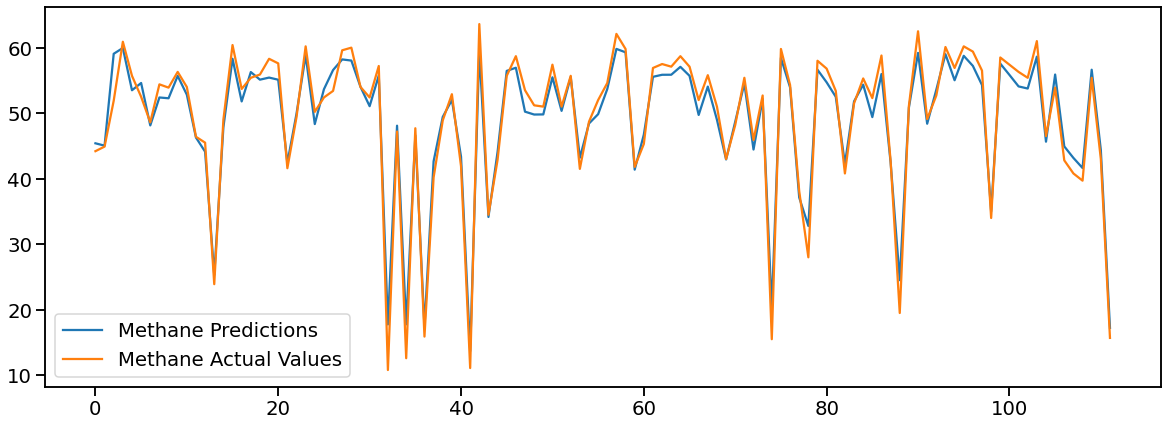

In [ ]:
# plot rf predictions versus real y values
plt.figure(figsize=(20,7))
sns.lineplot(x=X_test.index, y=rf_pipe.predict(X_test), label='Methane Predictions')
sns.lineplot(x=X_test.index, y=y_test.values, label='Methane Actual Values')
plt.legend()

In [ ]:
y_test.values

array([44.2, 44.9, 51.9, 60.9, 55.7, 52.5, 48.6, 54.4, 53.9, 56.3, 54. ,
       46.4, 45.5, 23.9, 49. , 60.4, 53.7, 55.4, 55.9, 58.3, 57.6, 41.6,
       49.4, 60.2, 50.2, 52.4, 53.4, 59.6, 60. , 54. , 52.4, 57.2, 10.8,
       47.2, 12.6, 47.7, 15.9, 40.2, 48.9, 52.9, 41.9, 11.1, 63.6, 34.5,
       42.9, 55.7, 58.7, 53.5, 51.2, 51. , 57.4, 51. , 55.7, 41.5, 48.7,
       52. , 54.6, 62.1, 59.8, 41.8, 45.3, 56.9, 57.5, 57.1, 58.7, 57.1,
       52. , 55.8, 51. , 43. , 48.2, 55.4, 45.9, 52.7, 15.5, 59.8, 54.3,
       38.1, 28. , 58. , 56.8, 53.4, 40.8, 51.5, 55.3, 52.3, 58.8, 42.7,
       19.5, 51.1, 62.5, 49.1, 52.7, 60.1, 56.9, 60.2, 59.4, 56.5, 34. ,
       58.5, 57.4, 56.3, 55.4, 61. , 46.5, 53.9, 42.8, 40.8, 39.7, 55.4,
       43. , 15.7])

## Part 2: Biogas Yield Modelling

In [ ]:
# Import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# import random forest regressor
from sklearn.ensemble import RandomForestRegressor

# instantiate the random forest regressor
rf = RandomForestRegressor()

# Instantiate iterative imputer
imp = IterativeImputer(estimator=rf, max_iter=10, random_state=101)

# Fit and transform each dataframes
gas = imp.fit_transform(df[['CH4', 'pH', 'gas_volume']].to_numpy())
batch['gas_volume'] = pd.DataFrame(gas)[2]

In [ ]:
# determine X and y
X = batch.drop(columns=['gas_volume', 'H2S'])
y = batch['gas_volume']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

# select columns
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

cat_columns_train = cat_selector(X_train)
cat_columns_test = cat_selector(X_test)
num_columns_train = cat_selector(X_train)
num_columns_test = num_selector(X_test)

cat_data_train = batch[cat_columns_train]
cat_data_test = batch[cat_columns_test]
num_data_train = batch[num_columns_train]
num_data_test = batch[num_columns_test]

In [ ]:
# instantiate simple imputer
mean_imputer = SimpleImputer(strategy='mean')

# fit the simple imputer with the data
mean_imputer_train = mean_imputer.fit_transform(X_train)
mean_imputer_test = mean_imputer.transform(X_test)

# instantiate standardscaler
scaler = StandardScaler()

# fit and transform the data with the scaler
train_scale = scaler.fit_transform(X_train)
test_scale = scaler.transform(X_test)

# make a pipeline
pipe = Pipeline(
    steps=(['Simple Imputer', mean_imputer], ['Standard Scaler', scaler])
)

In [ ]:
# make a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", pipe, num_selector),
        ("cat", pipe, cat_selector)
    ]
)

# fit and transform with the Xtrain and Xtest
X_train = pd.DataFrame(preprocessor.fit_transform(X_train))
X_test = pd.DataFrame(preprocessor.fit_transform(X_test))

### Linear Regression

In [ ]:
# import the model
from sklearn.linear_model import LinearRegression

# instantiate the model
lr = LinearRegression()

# make a pipeline
lr_pipe = Pipeline(
    steps=(['Standard Scaler', scaler], ['Linear Regression', lr])
)

In [ ]:
# fit the model with the data
lr_pipe.fit(X_train, y_train)

# make predictions
lr_predictions = lr_pipe.predict(X_test)

# evaluate the model
print(f'Train R2: {r2_score(y_train, lr_pipe.predict(X_train))}')
print(f'Test R2: {r2_score(y_test, lr.predict(X_test))}')

Train R2: 0.43210160914033147
Test R2: 0.4024133783380749


#### Random Forest Regressor

In [ ]:
# import the model
from sklearn.ensemble import RandomForestRegressor

# instantiate the model
rf = RandomForestRegressor()

# make a pipeline
rf_pipe = Pipeline(
    steps=(['Standard Scaler', scaler], ['Random Forest Regressor', rf])
)

In [ ]:
# fit the model with the data
rf_pipe.fit(X_train, y_train)

# make predictions
rf_predictions = rf_pipe.predict(X_test)

# evaluate the model
rf_train_score = rf_pipe.score(X_train, y_train)
rf_test_score = rf_pipe.score(X_test, y_test)
print(f"Train score is {rf_train_score}")
print(f"Test score is {rf_test_score}")

Train score is 0.9999017095060325
Test score is 0.8066746947916144


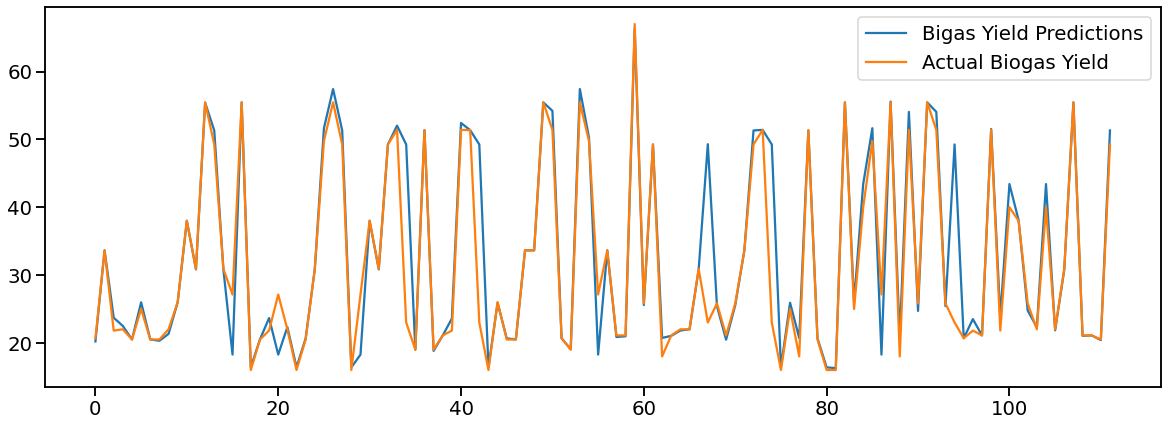

In [ ]:
# plot rf predictions versus real y values
plt.figure(figsize=(20,7))
sns.lineplot(x=X_test.index, y=rf_pipe.predict(X_test), label='Bigas Yield Predictions')
sns.lineplot(x=X_test.index, y=y_test.values, label='Actual Biogas Yield')
plt.legend()